In [1]:
import pandas as pd
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [4]:
TrnFlsPth=gb.glob("DTrain/*/*")
TstFlsPth=gb.glob("DTest/*/*")

In [5]:
Tr_lbl=[e.strip().split('\\')[1] for e in TrnFlsPth]
Ts_lbl=[e.strip().split('\\')[1] for e in TstFlsPth]
trl=[]
a={trl.append(e) for e in Tr_lbl if(e not in trl)}
tsl=[]
a={tsl.append(e) for e in Ts_lbl if(e not in tsl)}
a=None
print(trl, '\n', tsl)

['alum', 'barley', 'coffee', 'dmk', 'fuel', 'livestock', 'palm-oil', 'retail', 'soybean', 'veg-oil'] 
 ['alum', 'barley', 'coffee', 'dmk', 'fuel', 'livestock', 'palm-oil', 'retail', 'soybean', 'veg-oil']


In [6]:
le =LabelEncoder()
Y_Tr=le.fit_transform(Tr_lbl)
Y_Ts=le.fit_transform(Ts_lbl)

In [7]:
fpt=[open(f) for f in TrnFlsPth]
Trfob=[f.read().replace("\\",'').replace('//',' ').replace('/',' ') for f in fpt]
all(f.close() for f in fpt)

False

In [8]:
fpt=[open(f) for f in TstFlsPth]
Tsfob=[f.read().replace("\\",'').replace('//',' ').replace('/',' ') for f in fpt]
all(f.close() for f in fpt)
fpt=None

In [9]:
rd={'\n':' ','<':' ','>':' ','(':' ',')':' ','[':' ',']':' ','{':' ','}':' ','?':' ',  
    ':':' ', ",":'','.':' ', '|':' ', '_':' ', '||':' '}
#\

In [10]:
Trfob=[''.join([rd.get(c,c) for c in flob]) for flob in Trfob]
Tsfob=[''.join([rd.get(c,c) for c in flob]) for flob in Tsfob]

In [11]:
Trfob=[' '.join(flob.split()) for flob in Trfob]
Tsfob=[' '.join(flob.split()) for flob in Tsfob]

In [12]:
lm=WordNetLemmatizer()
ps=PorterStemmer()
Trfob=[' '.join([lm.lemmatize(word) for word in text.split(' ')]) for text in Trfob]
Tsfob=[' '.join([lm.lemmatize(word) for word in text.split(' ')]) for text in Tsfob]
Trfob=[' '.join([ps.stem(word) for word in text.split(' ')]) for text in Trfob]
Tsfob=[' '.join([ps.stem(word) for word in text.split(' ')]) for text in Tsfob]

In [13]:
Trfob[0]

"nippon light metal continu aluminium output cut tokyo march 2 - nippon light metal Co ltd nlgt T which ha annual capac of 63000 tonn will continu primari aluminium product at a rate of 35000 tonn owe to low domest and world price and low water suppli at it hydroelectr power plant a compani offici said nippon which ha no plan to restor output to the 48000 tonn a year at which it wa work until late 1986 will becom japan' onli smelter ryoka light metal industri ltd will stop smelt in april owe to high power cost and low price and mitsui aluminium Co ltd ha said it stop smelt in februari"

In [14]:
vc=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.3, min_df=1,
                   ngram_range=(1, 1), stop_words='english')
idft=TfidfTransformer()

In [15]:
TrDvcX=vc.fit_transform(Trfob)
TrDtvcX=idft.fit_transform(TrDvcX.toarray())
###############
TsDvcX=vc.transform(Tsfob)
TsDtvcX=idft.transform(TsDvcX.toarray())

In [16]:
TrDvc=pd.DataFrame(TrDvcX.toarray(), columns=vc.get_feature_names())
TrDtvc=pd.DataFrame(TrDtvcX.toarray(), columns=vc.get_feature_names())
###############
TsDvc=pd.DataFrame(TsDvcX.toarray(), columns=vc.get_feature_names())
TsDtvc=pd.DataFrame(TsDtvcX.toarray(), columns=vc.get_feature_names())

In [17]:
print(TrDvc.shape, TrDtvc.shape, TsDvc.shape, TsDtvc.shape)

(499, 5694) (499, 5694) (185, 5694) (185, 5694)


In [18]:
lex=['0','00','000','0000']
exstp=[fv for fv in TrDtvc if(len(fv)<3)]
stpwd=ENGLISH_STOP_WORDS.union(exstp,lex)
len(stpwd)

488

In [19]:
#########

In [20]:
clfs=LogisticRegression()
clfs

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
evlp=['Precision_micro','Recall_micro','Precision_macro','Recall_macro','f1_micro',
     'f1_macro','Accuracy']
confp=['max df','min df','ngram','idf','no. token','C','gamma','solver','max iter']
confg=[]
prf=[]

In [24]:
clfs.fit(TrDvc, Tr_lbl)

c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred=clfs.predict(TsDvc)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
print(a1,'\n',a2,'\n',a3,'\n',a4)

0.7405405405405405 
 0.7405405405405405 
 0.7725265995726354 
 0.7378123521601783


In [26]:
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))
confg.append(('0.3','1',"1 - 1",'No','5694','1','1','liblinear','100'))

0.7405405405405405 
 0.7291011504125162 
 0.7405405405405405


In [27]:
cm=confusion_matrix(Ts_lbl, y_pred)
m=pd.DataFrame(cm, columns=tsl, index=tsl)

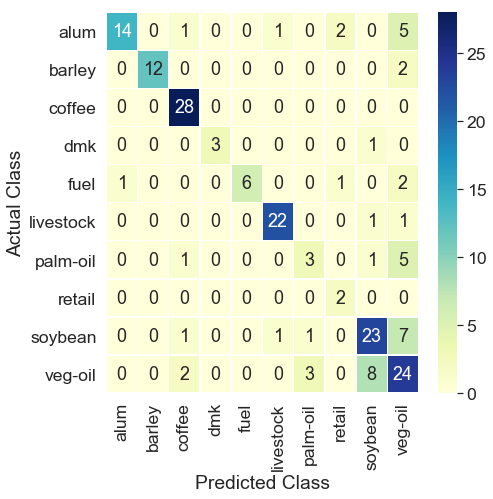

In [28]:
plt.figure(figsize=(7,7))
sb.set(font_scale=1.6)
sb.heatmap(m, annot=True, cmap="YlGnBu", linewidths=.5, annot_kws={"size": 18})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
#plt.title('Confusion Matrix LGR_fig1')
plt.savefig('Fig/LGRcm1.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [29]:
################t

In [30]:
clfs.fit(TrDtvc, Tr_lbl) 

c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_pred=clfs.predict(TsDtvc)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
print(a1,'\n',a2,'\n',a3,'\n',a4)

0.6648648648648648 
 0.6648648648648648 
 0.6607994675436537 
 0.5661564062651019


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))
confg.append(('0.3','1',"1 - 1",'Yes','5694','1','1','liblinear','100'))

0.6648648648648648 
 0.5767995065612511 
 0.6648648648648648


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
cm=confusion_matrix(Ts_lbl, y_pred)
m=pd.DataFrame(cm, columns=tsl, index=tsl)

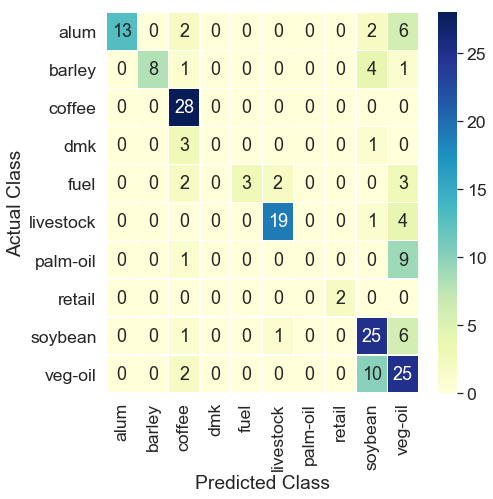

In [34]:
plt.figure(figsize=(7,7))
sb.set(font_scale=1.6)
sb.heatmap(m, annot=True, cmap="YlGnBu", linewidths=.5, fmt="d", annot_kws={"size": 18})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.savefig('Fig/LGRcm2.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [35]:
stp=pd.DataFrame(confg, columns=confp)
stp.to_csv('CSVOUT/LGRconf1.csv')
stp

,max df,min df,ngram,idf,no. token,C,gamma,solver,max iter
0,0.3,1,1 - 1,No,5694,1,1,lbfgs,100
1,0.3,1,1 - 1,Yes,5694,1,1,lbfgs,100


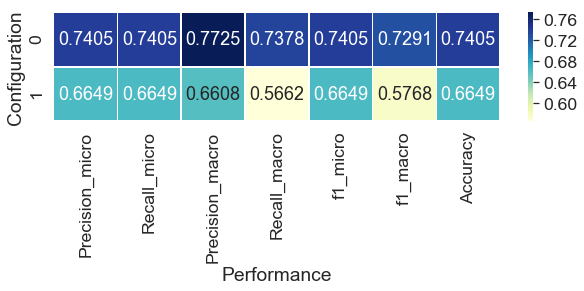

In [36]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/LGRprf1.csv')
plt.figure(figsize=(10,2))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix LGR_fig2')
plt.savefig('Fig/LGRprf1.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [38]:
prf=[]
clsfv=LogisticRegression()
clsfv

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
pipclf = Pipeline([('vct', vc), ('clf',clsfv)])#('idf', idft),

In [40]:
mxd=[ 0.3, 0.35, 0.4]
mid=[0.005,0.01, 0.05, 0.1,1]
ngm=[(1,2),(1,3),(2,5),(1,7),(1,9),(1,12)]

In [44]:
#'C','gamma','kernel','max iter'
c=[0.05,0.1,0.2,0.3,1,2,7,9]
gma=[0.1,0.3,1,2,3,10]
sov=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']#'precomputed' not supported for sparse matrix

In [47]:
pramg={"vct__max_df":mxd, "vct__min_df":mid, "vct__ngram_range":ngm,
       "vct__stop_words":['english', stpwd],
       "clf__C":c, "clf__intercept_scaling":gma,"clf__solver":sov,
       }

In [48]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [49]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.4, max_features=None, min_df=0.01,
         ngram_range=(1, 9), preprocessor=None,
         stop_words=frozenset({'some', 'has', '59', 'than', 'pl', 'except', 'lt', 'thick', 'almost', 'through', 'again', 'seems', 'ye', 'wherein', 'anywhere', 'too', 'neither', 'fifty', 'hundred', 'many', 'behind', 'put', 'side', 'must', 'less', '75', '06', 'its', 'toward', 'so', 'still', 'him', 'former', 'i...', 'formerly', 'should', 'am', '36', '74', 'dn', 'hi', 'might', 'ten', '11', 'nothing', 'bu', 'x1'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'clf': LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=0.1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, s

In [50]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.745945945945946 
 0.745945945945946 
 0.7642277167277167 
 0.706565143630361 
 0.7459459459459459 
 0.6883236601022306 
 0.745945945945946


In [51]:
#############

In [52]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [53]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.4, max_features=None, min_df=0.005,
         ngram_range=(1, 2), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'clf': LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=2, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False)}

In [54]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.745945945945946 
 0.745945945945946 
 0.7892346241183451 
 0.7202476205737076 
 0.7459459459459459 
 0.7170328061270304 
 0.745945945945946


c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [55]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [56]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.005,
         ngram_range=(1, 2), preprocessor=None,
         stop_words=frozenset({'some', 'has', '59', 'than', 'pl', 'except', 'lt', 'thick', 'almost', 'through', 'again', 'seems', 'ye', 'wherein', 'anywhere', 'too', 'neither', 'fifty', 'hundred', 'many', 'behind', 'put', 'side', 'must', 'less', '75', '06', 'its', 'toward', 'so', 'still', 'him', 'former', 'i...', 'formerly', 'should', 'am', '36', '74', 'dn', 'hi', 'might', 'ten', '11', 'nothing', 'bu', 'x1'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'clf': LogisticRegression(C=7, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=3, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, sol

In [57]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.7675675675675676 
 0.7675675675675676 
 0.7920166870166869 
 0.7472981493633669 
 0.7675675675675676 
 0.7453700669885835 
 0.7675675675675676


In [59]:
c=[0.05,0.1,0.2,0.3,1,2,7,9,11]

In [60]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [61]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.01,
         ngram_range=(1, 3), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'clf': LogisticRegression(C=9, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=2, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='saga',
           tol=0.0001, verbose=0, warm_start=False)}

In [62]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.7513513513513513 
 0.7513513513513513 
 0.7772911971749181 
 0.7168927439579614 
 0.7513513513513513 
 0.7111604649660637 
 0.7513513513513513


In [63]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [64]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.005,
         ngram_range=(1, 7), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'clf': LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=0.1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
           tol=0.0001, verbose=0, warm_start=False)}

In [65]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.7513513513513513 
 0.7513513513513513 
 0.7843484848484847 
 0.7178826666870146 
 0.7513513513513513 
 0.7150979060616923 
 0.7513513513513513


In [67]:
#ruk ruk##############ruk ruk

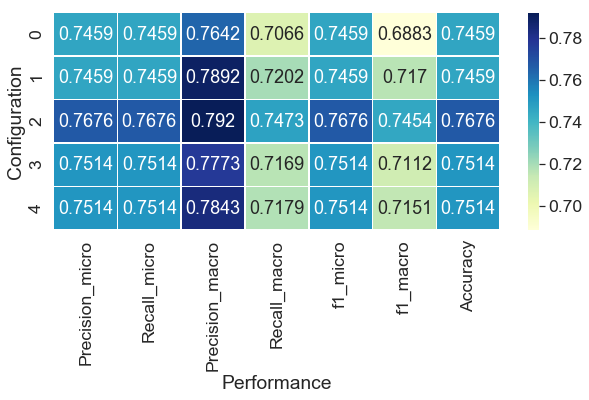

In [68]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/LGRprf2.csv')
plt.figure(figsize=(10,4))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix LGR_fig2')
plt.savefig('Fig/LGRprf2.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [ ]:
#ruk ruk ################ ruk ruk##########################################

In [69]:
prf=[]
pipclf = Pipeline([('vct', vc), ('idf', idft), ('clf',clsfv)])#

In [70]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [71]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.01,
         ngram_range=(1, 7), preprocessor=None,
         stop_words=frozenset({'some', 'has', '59', 'than', 'pl', 'except', 'lt', 'thick', 'almost', 'through', 'again', 'seems', 'ye', 'wherein', 'anywhere', 'too', 'neither', 'fifty', 'hundred', 'many', 'behind', 'put', 'side', 'must', 'less', '75', '06', 'its', 'toward', 'so', 'still', 'him', 'former', 'i...', 'formerly', 'should', 'am', '36', '74', 'dn', 'hi', 'might', 'ten', '11', 'nothing', 'bu', 'x1'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=0.1, max_i

In [72]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7135135135135136 
 0.7135135135135136 
 0.7765301489016659 
 0.6235827979306241 
 0.7135135135135136 
 0.6454317643075408 
 0.7135135135135136


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_macro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_
clfrb.named_steps

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.3, max_features=None, min_df=0.01,
         ngram_range=(1, 12), preprocessor=None,
         stop_words=frozenset({'some', 'has', '59', 'than', 'pl', 'except', 'lt', 'thick', 'almost', 'through', 'again', 'seems', 'ye', 'wherein', 'anywhere', 'too', 'neither', 'fifty', 'hundred', 'many', 'behind', 'put', 'side', 'must', 'less', '75', '06', 'its', 'toward', 'so', 'still', 'him', 'former', 'i...', 'formerly', 'should', 'am', '36', '74', 'dn', 'hi', 'might', 'ten', '11', 'nothing', 'bu', 'x1'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': LogisticRegression(C=7, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_ite

In [75]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.7405405405405405 
 0.7405405405405405 
 0.7901586545549394 
 0.7083782512043382 
 0.7405405405405405 
 0.7229500316255534 
 0.7405405405405405


In [76]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_macro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_
clfrb.named_steps

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.3, max_features=None, min_df=0.01,
         ngram_range=(1, 9), preprocessor=None,
         stop_words=frozenset({'some', 'has', '59', 'than', 'pl', 'except', 'lt', 'thick', 'almost', 'through', 'again', 'seems', 'ye', 'wherein', 'anywhere', 'too', 'neither', 'fifty', 'hundred', 'many', 'behind', 'put', 'side', 'must', 'less', '75', '06', 'its', 'toward', 'so', 'still', 'him', 'former', 'i...', 'formerly', 'should', 'am', '36', '74', 'dn', 'hi', 'might', 'ten', '11', 'nothing', 'bu', 'x1'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=0.3, max_it

In [77]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.3, max_features=None, min_df=0.01,
         ngram_range=(1, 9), preprocessor=None,
         stop_words=frozenset({'some', 'has', '59', 'than', 'pl', 'except', 'lt', 'thick', 'almost', 'through', 'again', 'seems', 'ye', 'wherein', 'anywhere', 'too', 'neither', 'fifty', 'hundred', 'many', 'behind', 'put', 'side', 'must', 'less', '75', '06', 'its', 'toward', 'so', 'still', 'him', 'former', 'i...', 'formerly', 'should', 'am', '36', '74', 'dn', 'hi', 'might', 'ten', '11', 'nothing', 'bu', 'x1'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=0.3, max_it

In [78]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7027027027027027 
 0.7027027027027027 
 0.7649106035808163 
 0.6240107258585519 
 0.7027027027027027 
 0.6472263038429061 
 0.7027027027027027


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [79]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [80]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.3, max_features=None, min_df=0.01,
         ngram_range=(1, 12), preprocessor=None,
         stop_words=frozenset({'some', 'has', '59', 'than', 'pl', 'except', 'lt', 'thick', 'almost', 'through', 'again', 'seems', 'ye', 'wherein', 'anywhere', 'too', 'neither', 'fifty', 'hundred', 'many', 'behind', 'put', 'side', 'must', 'less', '75', '06', 'its', 'toward', 'so', 'still', 'him', 'former', 'i...', 'formerly', 'should', 'am', '36', '74', 'dn', 'hi', 'might', 'ten', '11', 'nothing', 'bu', 'x1'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': LogisticRegression(C=7, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=2, max_ite

In [81]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.7405405405405405 
 0.7405405405405405 
 0.7901586545549394 
 0.7083782512043382 
 0.7405405405405405 
 0.7229500316255534 
 0.7405405405405405


In [83]:
#ruk ###############

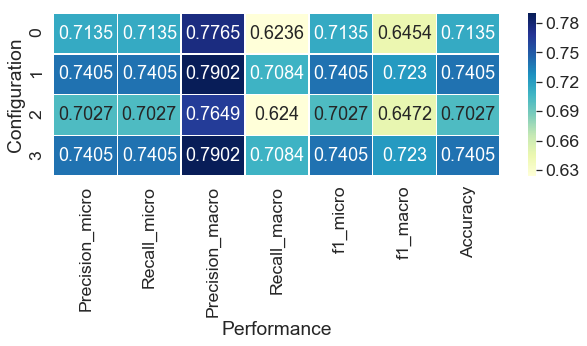

In [84]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/LGRprf3.csv')
plt.figure(figsize=(10,3))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix LGR_fig2')
plt.savefig('Fig/LGRprf3.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [239]:
#ruk ##############################################

In [260]:
evlp=['Precision_micro','Recall_micro','Precision_macro','Recall_macro','f1_micro',
     'f1_macro','Accuracy']
confp=['max df','min df','ngram','idf','no. token','C','gamma','solver','max iter']
confg=[]
prf=[]

In [261]:
vc1=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.35, min_df=0.005,
                   ngram_range=(1, 3), stop_words=stpwd)
idft1=TfidfTransformer()

In [262]:
TrDX=vc1.fit_transform(Trfob)
TrDtX=idft1.fit_transform(TrDX.toarray())
###############
TsDX=vc1.transform(Tsfob)
TsDtX=idft1.transform(TsDX.toarray())

In [263]:
TrD=pd.DataFrame(TrDX.toarray(), columns=vc1.get_feature_names())
TrDt=pd.DataFrame(TrDtX.toarray(), columns=vc1.get_feature_names())
###############
TsD=pd.DataFrame(TsDX.toarray(), columns=vc1.get_feature_names())
TsDt=pd.DataFrame(TsDtX.toarray(), columns=vc1.get_feature_names())

In [264]:
print(TrD.shape, TrDt.shape, TsD.shape, TsDt.shape)

(499, 7128) (499, 7128) (185, 7128) (185, 7128)


In [265]:
#'lbfgs', 'liblinear', 'sag', 'saga'
clf=LogisticRegression(C=6,intercept_scaling=0.3, max_iter=1500, solver='liblinear',tol=0.00001)

In [266]:
clf.fit(TrD, Tr_lbl)

c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=0.3, max_iter=1500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=1e-05, verbose=0, warm_start=False)

In [267]:
y_pred=clf.predict(TsD)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)

0.7567567567567568 
 0.7567567567567568 
 0.7812770562770563 
 0.7212405700449179 
 0.7567567567567567 
 0.7143792190083673 
 0.7567567567567568


In [268]:
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),round(a7,4)))
confg.append(('0.3','0.005',"1 - 3",'No','7128','6','0.3','liblinear','1500'))

In [269]:
#####################

In [270]:
clf.fit(TrDt, Tr_lbl)

c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=0.3, max_iter=1500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=1e-05, verbose=0, warm_start=False)

In [271]:
y_pred=clf.predict(TsDt)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)

0.7513513513513513 
 0.7513513513513513 
 0.7917754919499105 
 0.718510168836256 
 0.7513513513513513 
 0.7183413451084684 
 0.7513513513513513


In [272]:
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),round(a7,4)))
confg.append(('0.3','0.005',"1 - 3",'Yes','7128','6','0.3','liblinear','1500'))

In [273]:
stp=pd.DataFrame(confg, columns=confp)
stp.to_csv('CSVOUT/LGRconf5.csv')
stp

,max df,min df,ngram,idf,no. token,C,gamma,solver,max iter
0,0.3,0.005,1 - 3,No,7128,6,0.3,liblinear,1500
1,0.3,0.005,1 - 3,Yes,7128,6,0.3,liblinear,1500


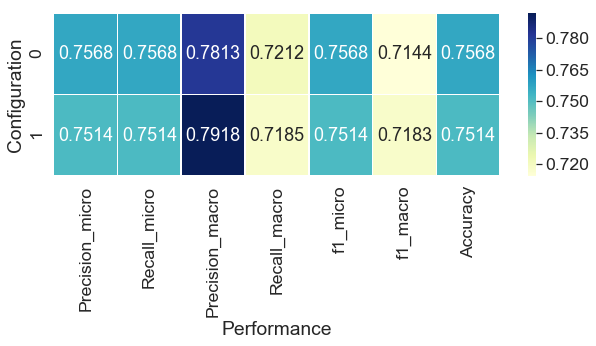

In [274]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/LGRprf5.csv')
plt.figure(figsize=(10,3))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix LGR_fig2')
plt.savefig('Fig/LGRprf5.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

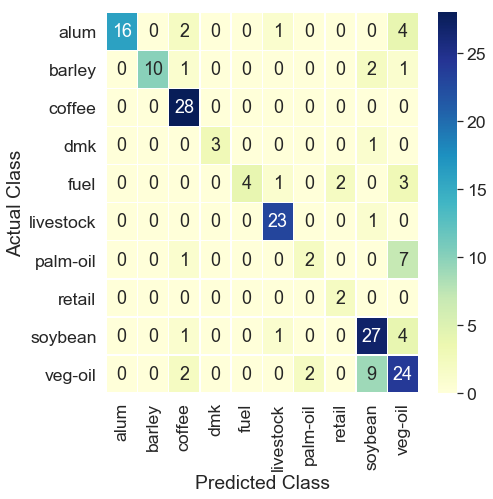

In [275]:
cm=confusion_matrix(Ts_lbl, y_pred)
m=pd.DataFrame(cm, columns=tsl, index=tsl)
plt.figure(figsize=(7,7))
sb.set(font_scale=1.6)
sb.heatmap(m, annot=True, cmap="YlGnBu", linewidths=.5, annot_kws={"size": 18})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
#plt.title('Confusion Matrix LGR_fig1')
plt.savefig('Fig/LGRcm3.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [276]:
################

In [277]:
cvp=['1','2','3','4','5','6','7','8','9','10','Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clf, TrDt, Tr_lbl, cv=10, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/10)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('10')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clf, TrDt, Tr_lbl, cv=10, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/10)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('10')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/LGRcvp110t.csv')
rsl

c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\lo

[0.7593, 0.7736, 0.7547, 0.8235, 0.7647, 0.7755, 0.8163, 0.8298, 0.7826, 0.7391, 0.7819159539340572, 'f1 micro', '10'] 
 Average Score : 0.7819159539340572


c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic

[0.7784, 0.7584, 0.7044, 0.8346, 0.7504, 0.7065, 0.7766, 0.81, 0.7842, 0.735, 0.7638609857410503, 'f1 macro', '10'] 
 Average Score : 0.7638609857410503


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,1,2,3,4,5,6,7,8,9,10,Average,metric,cv fold
0,0.7593,0.7736,0.7547,0.8235,0.7647,0.7755,0.8163,0.8298,0.7826,0.7391,0.781916,f1 micro,10
1,0.7784,0.7584,0.7044,0.8346,0.7504,0.7065,0.7766,0.8100,0.7842,0.7350,0.763861,f1 macro,10


In [278]:
cvp=['1','2','3','4','5','6','7','8','9','10','Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clf, TrD, Tr_lbl, cv=10, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/10)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('10')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clf, TrD, Tr_lbl, cv=10, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/10)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('10')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/LGRcvp110.csv')
rsl

c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\lo

[0.7593, 0.7925, 0.7736, 0.8235, 0.8039, 0.7959, 0.8163, 0.8511, 0.8696, 0.8043, 0.8089969746725153, 'f1 micro', '10'] 
 Average Score : 0.8089969746725153


c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\lo

[0.7784, 0.7713, 0.7737, 0.8346, 0.8064, 0.812, 0.7734, 0.8065, 0.8467, 0.8182, 0.8021131164941908, 'f1 macro', '10'] 
 Average Score : 0.8021131164941908


,1,2,3,4,5,6,7,8,9,10,Average,metric,cv fold
0,0.7593,0.7925,0.7736,0.8235,0.8039,0.7959,0.8163,0.8511,0.8696,0.8043,0.808997,f1 micro,10
1,0.7784,0.7713,0.7737,0.8346,0.8064,0.8120,0.7734,0.8065,0.8467,0.8182,0.802113,f1 macro,10


In [279]:
cvp=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20',
    'Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clf, TsDt, Ts_lbl, cv=20, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/20)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('20')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clf, TsDt, Ts_lbl, cv=20, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/20)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('20')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/LGRcvpf120.csv')
rsl
#print(len(sr1),len(sr2))

c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib

[0.6, 0.8, 0.7143, 0.5385, 0.3636, 0.3636, 0.5455, 0.6364, 0.6, 0.8, 1.0, 0.875, 0.5, 0.7143, 0.8333, 0.3333, 0.6667, 0.6, 0.6, 0.8, 0.6442228604728605, 'f1 micro', '20'] 
 Average Score : 0.6442228604728605


c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:46

[0.5733, 0.73, 0.6259, 0.3524, 0.25, 0.3333, 0.55, 0.7083, 0.6, 0.7917, 1.0, 0.8889, 0.381, 0.6944, 0.76, 0.4, 0.6333, 0.5, 0.5333, 0.6667, 0.5986296296296296, 'f1 macro', '20'] 
 Average Score : 0.5986296296296296


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: D

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,Average,metric,cv fold
0,0.6000,0.80,0.7143,0.5385,0.3636,0.3636,0.5455,0.6364,0.6,0.8000,...,0.7143,0.8333,0.3333,0.6667,0.6,0.6000,0.8000,0.644223,f1 micro,20
1,0.5733,0.73,0.6259,0.3524,0.2500,0.3333,0.5500,0.7083,0.6,0.7917,...,0.6944,0.7600,0.4000,0.6333,0.5,0.5333,0.6667,0.598630,f1 macro,20
